# Imports & setup

In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
from models import *
import torch
from torch import nn
from torchvision import datasets
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Training

In [ ]:
path_pair_img = '../data/photoshoptest_cropped'
dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

In [4]:
batch_size = 5
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
epochs = 20
torch.cuda.empty_cache()

for i in range(1):
    model_crop = LeNet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_crop.parameters(), lr=1e-3)
    print("CrossValidation : "+str(i)+"\n-------------------------------\n")
    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


    # Create the data loaders for training and validation
    train_dataloader = torch.utils.data.DataLoader(
        train_data,
        batch_size=100,
        shuffle=True
    )

    test_dataloader = torch.utils.data.DataLoader(
        test_data,
        batch_size=100,
        shuffle=False
    )
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model_crop, loss_fn, optimizer)
        #test_basic(test_dataloader, model) # for cross validation
    print("Done!")



In [5]:
torch.save(model_crop.state_dict(), "./model_crop")

# Test 

In [3]:
model_crop = LeNet().to(device)
model_crop.load_state_dict(torch.load("./model_crop"))
model_crop.eval()

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

In [4]:
path_pair_img = '../data/photoshoptest_handmade_crop_test'
dataset = datasets.ImageFolder(root=path_pair_img, transform=image_transform)

test_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=100,
    shuffle=False
)

In [5]:
y_true, y_score = test_basic(test_dataloader, model_crop)

In [6]:
performance = get_performance(y_true, y_score)

In [7]:
#output : 
#   [accuracy, 
#   f1, 
#   precision, 
#   recall, 
#   roc_auc, 
#   conf_mat, 
#   fp, 
#   fn, 
#   tp, 
#   tn]
performance

[0.414962325080732,
 0.414962325080732,
 0.414962325080732,
 0.414962325080732,
 0.7595456546137607,
 array([[  0,   0,   0,   0,   0,   1,   0,   0],
        [  0,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0, 189,   7,   0,   0,   3,   3],
        [ 10,   1,   5, 131,   0,   2, 104,  89],
        [ 35,  13,   0,   9,  22,   2,  16,  38],
        [  5,   0,  10,  11,   0,   5,   4,   2],
        [ 17,   1,   9,  61,   2,   6,  42, 142],
        [ 13,   0,   7, 195,   0,   3, 261, 381]], dtype=int64),
 array([ 80,  15,  31, 283,   2,  14, 388, 274], dtype=int64),
 array([  1,   0,  13, 211, 113,  32, 238, 479], dtype=int64),
 array([  0,   1, 189, 131,  22,   5,  42, 381], dtype=int64),
 array([1777, 1842, 1625, 1233, 1721, 1807, 1190,  724], dtype=int64)]

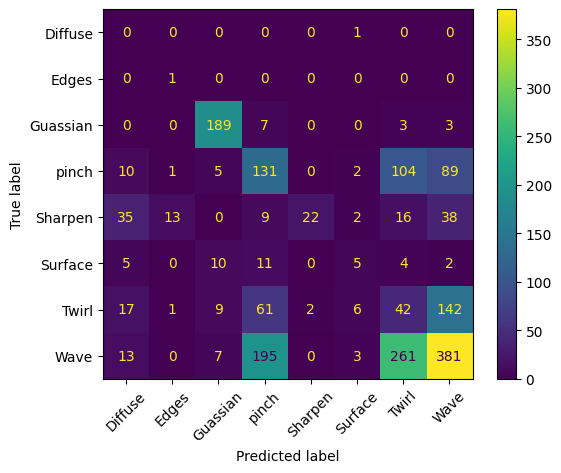

In [8]:
conf_matrix = performance[5]
labels = ["Diffuse", "Edges", "Guassian", "pinch", "Sharpen", "Surface", "Twirl", "Wave"]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = labels)
disp.plot()
plt.xticks(rotation = 45) 
plt.show()